### **1. Business Understanding 🔍**

### **Objective:**

Analyze the Brazilian e-commerce dataset to uncover insights about sales performance, customer behavior, operational efficiency, and overall market trends. The goal is to support decision-making by providing actionable insights.

### **Key Business Questions:**

1. **❓ How are overall sales and revenue trending over time?**
2. **❓ Which product categories and sellers contribute most to revenue?**
3. **❓ How efficient is the delivery process in terms of on-time performance?**
4. **❓ What payment methods are most popular and how do they impact revenue?**
5. **❓ How do customer reviews correlate with order performance?**
6. **❓ Which customers are most engaged or valuable?**
7. **❓ What are the operational bottlenecks in shipping and order processing?**

In [2]:
# Imported all the neccesary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Loadd in all datasets
geolocation = pd.read_csv('Datasets\olist_geolocation_dataset.csv')
items = pd.read_csv('Datasets\olist_order_items_dataset.csv')
payments = pd.read_csv('Datasets\olist_order_payments_dataset.csv')
Reviews = pd.read_csv('Datasets\olist_order_reviews_dataset.csv')
orders = pd.read_csv('Datasets\olist_orders_dataset.csv')
products = pd.read_csv('Datasets\olist_products_dataset.csv')
sellers = pd.read_csv('Datasets\olist_sellers_dataset.csv')
product_category = pd.read_csv('Datasets\product_category_name_translation.csv')

<>:2: SyntaxWarning: invalid escape sequence '\o'
<>:3: SyntaxWarning: invalid escape sequence '\o'
<>:4: SyntaxWarning: invalid escape sequence '\o'
<>:5: SyntaxWarning: invalid escape sequence '\o'
<>:6: SyntaxWarning: invalid escape sequence '\o'
<>:7: SyntaxWarning: invalid escape sequence '\o'
<>:8: SyntaxWarning: invalid escape sequence '\o'
<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\o'
<>:3: SyntaxWarning: invalid escape sequence '\o'
<>:4: SyntaxWarning: invalid escape sequence '\o'
<>:5: SyntaxWarning: invalid escape sequence '\o'
<>:6: SyntaxWarning: invalid escape sequence '\o'
<>:7: SyntaxWarning: invalid escape sequence '\o'
<>:8: SyntaxWarning: invalid escape sequence '\o'
<>:9: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Admin\AppData\Local\Temp\ipykernel_1944\2970034499.py:2: SyntaxWarning: invalid escape sequence '\o'
  geolocation = pd.read_csv('Datasets\olist_geolocation_dataset.csv')
C:\Users\Admin\AppDa

# Merging all the datasets

In [4]:
# Merge 'orders' and 'items' on 'order_id'
merged_df = pd.merge(orders, items, on='order_id', how='left')

In [5]:
# Merge the result with 'payments'on 'order_id'
merged_df = pd.merge(merged_df, payments, on='order_id', how='left')

In [6]:
# Merge with products on 'product_id'
merged_df = pd.merge(merged_df, products, on='product_id', how='left')

In [7]:
# Merge with 'Reviews' on 'order_id'
merged_df = pd.merge(merged_df, Reviews, on='order_id', how = 'left')

In [8]:
# Merge the results with the sellers data on 'sellers_id'
merged_df = pd.merge(merged_df, sellers, on ='seller_id', how='left')

In [9]:
# Merge product category with product category
merged_df = pd.merge(merged_df, product_category, on ='product_category_name', how='left')

In [10]:
merged_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_category_name_english'],
      dtype='object')

In [11]:
# Dropping irrelevant columns
columns_to_drop = [
'order_item_id',          # Not needed for the dashboard.
'review_comment_title',   # Not relevant unless you are analyzing reviews in detail.
'review_comment_message', # Not relevant unless you are analyzing reviews in detail.
'product_name_lenght',    # Length of the product name is not important.
'product_description_lenght', # Length of the product description is not important.
'product_photos_qty',     # Not important unless analyzing photos and sales.
'product_category_name',  # Redundant column.
   # Redundant column.
]


# Drop the irrelevant columns
data = merged_df.drop(columns=columns_to_drop)

# Inspect the cleaned DataFrame
print(data.head())

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10

In [12]:
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,...,product_height_cm,product_width_cm,review_id,review_score,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,8.0,13.0,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11 00:00:00,2017-10-12 03:43:48,9350.0,maua,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,8.0,13.0,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11 00:00:00,2017-10-12 03:43:48,9350.0,maua,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,8.0,13.0,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11 00:00:00,2017-10-12 03:43:48,9350.0,maua,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,...,13.0,19.0,8d5266042046a06655c8db133d120ba5,4.0,2018-08-08 00:00:00,2018-08-08 18:37:50,31570.0,belo horizonte,SP,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,...,19.0,21.0,e73b67b67587f7644d5bd1a52deb1b01,5.0,2018-08-18 00:00:00,2018-08-22 19:07:58,14840.0,guariba,SP,auto


# Data Cleaning

In [13]:
# Renaming columns
data.rename(columns={'review_id_x':'Review_id', 'review_score_x':'Review_score', 'review_creation_date_x':'Review_creation_date', 'review_answer_timestamp_x':'Review_answer_timestamp', 'product_category_name_english_x':'Product_Category_name','product_weight_g':'product_weight(g)','product_length_cm':'product_length(cm)','product_height_cm':'product_height(cm)','product_width_cm':'product_width(cm)', 'order_approved_at':'order_approved_time', 'product_category_name_english': 'product_category'}, inplace=True)

In [14]:
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_time,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,...,product_height(cm),product_width(cm),review_id,review_score,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state,product_category
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,8.0,13.0,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11 00:00:00,2017-10-12 03:43:48,9350.0,maua,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,8.0,13.0,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11 00:00:00,2017-10-12 03:43:48,9350.0,maua,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,8.0,13.0,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-11 00:00:00,2017-10-12 03:43:48,9350.0,maua,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,...,13.0,19.0,8d5266042046a06655c8db133d120ba5,4.0,2018-08-08 00:00:00,2018-08-08 18:37:50,31570.0,belo horizonte,SP,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,...,19.0,21.0,e73b67b67587f7644d5bd1a52deb1b01,5.0,2018-08-18 00:00:00,2018-08-22 19:07:58,14840.0,guariba,SP,auto


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   customer_id                    119143 non-null  object 
 2   order_status                   119143 non-null  object 
 3   order_purchase_timestamp       119143 non-null  object 
 4   order_approved_time            118966 non-null  object 
 5   order_delivered_carrier_date   117057 non-null  object 
 6   order_delivered_customer_date  115722 non-null  object 
 7   order_estimated_delivery_date  119143 non-null  object 
 8   product_id                     118310 non-null  object 
 9   seller_id                      118310 non-null  object 
 10  shipping_limit_date            118310 non-null  object 
 11  price                          118310 non-null  float64
 12  freight_value                 

In [16]:
data.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_time               177
order_delivered_carrier_date     2086
order_delivered_customer_date    3421
order_estimated_delivery_date       0
product_id                        833
seller_id                         833
shipping_limit_date               833
price                             833
freight_value                     833
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
product_weight(g)                 853
product_length(cm)                853
product_height(cm)                853
product_width(cm)                 853
review_id                         997
review_score                      997
review_creation_date              997
review_answer_timestamp           997
seller_zip_code_prefix            833
seller_city 

In [17]:
# Dropping the missing values
data.dropna(inplace=True)

In [18]:
# Checking if missing values have been sorted
data.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_time              0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
product_weight(g)                0
product_length(cm)               0
product_height(cm)               0
product_width(cm)                0
review_id                        0
review_score                     0
review_creation_date             0
review_answer_timestamp          0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
product_category    

In [19]:
# Checking for duplicates
data.duplicated().sum()

10139

In [20]:
# Drop duplicated values
data.drop_duplicates(inplace=True)

In [21]:
! pip install faker

In [22]:
from faker import Faker
import pandas as pd

# Initialize Faker with the Brazilian Portuguese locale
fake = Faker('pt_BR')

# Get the unique seller IDs from your DataFrame
unique_sellers = data['seller_id'].unique()

# Create a mapping from seller_id to a fake name
seller_name_mapping = {seller: fake.name() for seller in unique_sellers}

# Create a new column 'seller_name' by mapping the seller_id using the generated names
data['seller_name'] = data['seller_id'].map(seller_name_mapping)

# Optionally, if you prefer to replace the seller_id with the name:
# merged_df_cleaned = merged_df_cleaned.drop('seller_id', axis=1).rename(columns={'seller_name': 'seller_id'})

# Display the first few rows to verify the changes
print(data[['seller_id', 'seller_name']].head())


                          seller_id              seller_name
0  3504c0cb71d7fa48d967e0e4c94d59d9  Srta. Sofia Vasconcelos
1  3504c0cb71d7fa48d967e0e4c94d59d9  Srta. Sofia Vasconcelos
2  3504c0cb71d7fa48d967e0e4c94d59d9  Srta. Sofia Vasconcelos
3  289cdb325fb7e7f891c38608bf9e0962           Sophie Pereira
4  4869f7a5dfa277a7dca6462dcf3b52b2         Caroline Machado


In [23]:
# Converting date/time columns into datetime formart
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])
data['order_approved_time'] = pd.to_datetime(data['order_approved_time'])
data['order_delivered_carrier_date'] = pd.to_datetime(data['order_delivered_carrier_date'])
data['order_delivered_customer_date'] = pd.to_datetime(data['order_delivered_customer_date'])
data['order_estimated_delivery_date'] = pd.to_datetime(data['order_estimated_delivery_date'])
data['shipping_limit_date'] = pd.to_datetime(data['shipping_limit_date'])
data['review_answer_timestamp'] = pd.to_datetime(data['review_answer_timestamp'])

In [24]:
# Export the combined dataFrame
data.to_csv('Final_data.csv', index=False)

# Exploratory Data Analysis

### 1. How have orders and revenue evolved over time

In [25]:
# Create year-month column
data['year_month'] = data['order_purchase_timestamp'].dt.strftime('%Y %m')

In [26]:
data['year_month']

0         2017 10
1         2017 10
2         2017 10
3         2018 07
4         2018 08
           ...   
119137    2017 03
119138    2018 02
119139    2017 08
119140    2018 01
119142    2018 03
Name: year_month, Length: 103054, dtype: object

In [27]:
# How has revenue evolved over time
total_revenue = data.groupby('year_month')['payment_value'].sum()
total_revenue

year_month
2016 10      50011.07
2016 12         19.62
2017 01     131793.27
2017 02     274309.59
2017 03     422458.23
2017 04     394248.11
2017 05     586308.00
2017 06     519342.63
2017 07     604644.49
2017 08     677747.03
2017 09     728996.24
2017 10     783179.60
2017 11    1226127.53
2017 12     862833.78
2018 01    1123863.22
2018 02     997722.70
2018 03    1150804.13
2018 04    1197129.86
2018 05    1204892.13
2018 06    1067616.19
2018 07    1067551.53
2018 08    1060873.91
Name: payment_value, dtype: float64

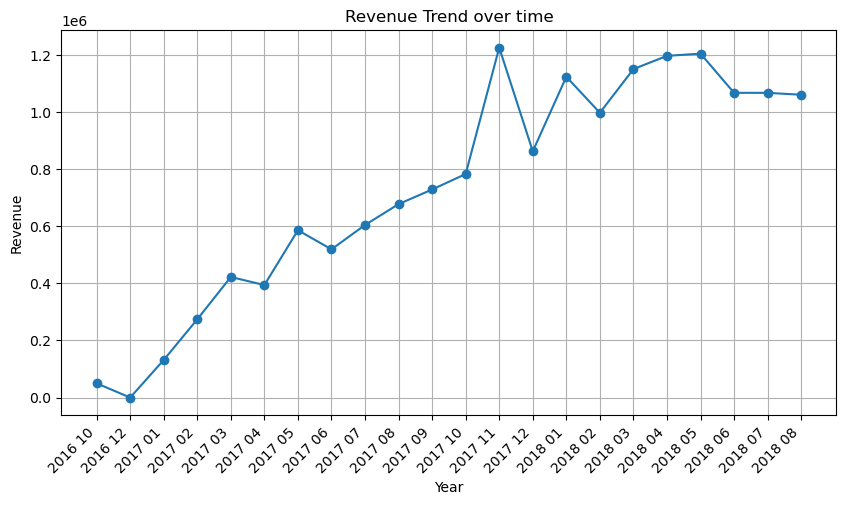

In [28]:
# Visualize how revenue have evolved over time
plt.figure(figsize=(10, 5))
plt.plot(total_revenue.index, total_revenue.values, marker='o', linestyle='-')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Revenue Trend over time')
plt.grid(True)
plt.show()

## Findings
- Number of orders increased form 2016 to 2018. Indicating Groth of the business
- 2017 November had the highest number of orders which was 8000
- There was a consistent number of orders in 2018 not below 6000 orders

In [29]:
# How have orders evolved over time
total_orders = data.groupby('year_month')['order_id'].count()
total_orders

year_month
2016 10     299
2016 12       1
2017 01     828
2017 02    1744
2017 03    2732
2017 04    2431
2017 05    3849
2017 06    3399
2017 07    4275
2017 08    4534
2017 09    4457
2017 10    4842
2017 11    7829
2017 12    5789
2018 01    7483
2018 02    6881
2018 03    7384
2018 04    7251
2018 05    7199
2018 06    6561
2018 07    6521
2018 08    6765
Name: order_id, dtype: int64

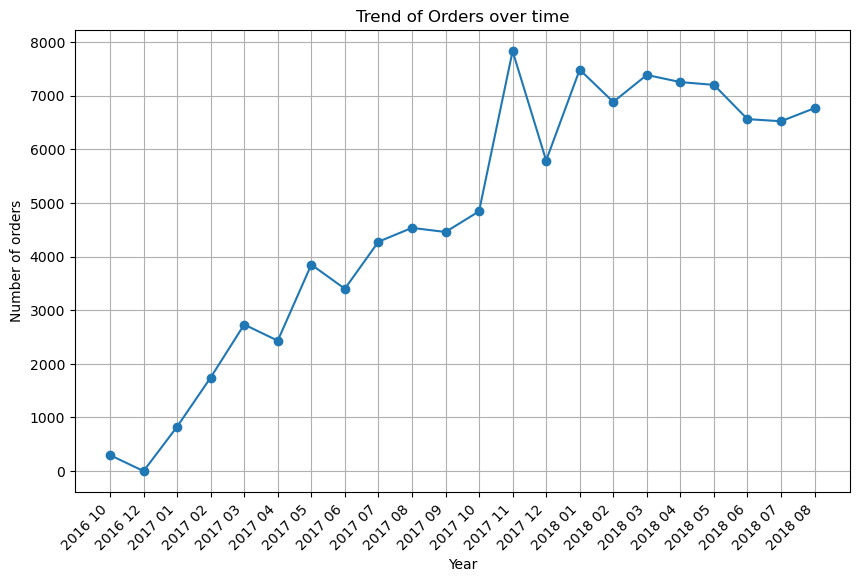

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(total_orders.index, total_orders.values, marker='o', linestyle='-')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Year')
plt.ylabel('Number of orders')
plt.title('Trend of Orders over time')
plt.grid(True)
plt.show()

### Is there a correlaction between Number of Orders and the Revenue

In [31]:
correlation_df = pd.DataFrame({'Total Revenue':total_revenue, 'Total Orders': total_orders})
correlation_df

,Total Revenue,Total Orders
year_month,,
2016 10,50011.07,299
2016 12,19.62,1
2017 01,131793.27,828
2017 02,274309.59,1744
2017 03,422458.23,2732
2017 04,394248.11,2431
2017 05,586308.00,3849
2017 06,519342.63,3399
2017 07,604644.49,4275


In [32]:
correlation = correlation_df[['Total Revenue', 'Total Orders']].corr()
print(correlation)

               Total Revenue  Total Orders
Total Revenue       1.000000      0.995221
Total Orders        0.995221      1.000000


Since the correlation is close to 1, it suggests that as the number of orders increases, the total revenue also increases proportionally.

## Which product categories and sellers contribute most to Revenue

In [33]:
# Which product contribute most revenue
category = data.groupby('product_category')['payment_value'].sum()
top_10_category = category.sort_values(ascending=False).head(10)
top_10_category

product_category
health_beauty            1459842.13
bed_bath_table           1447334.08
watches_gifts            1302780.28
sports_leisure           1164256.41
computers_accessories    1124292.30
furniture_decor           999108.61
housewares                801721.05
cool_stuff                701657.59
auto                      694268.83
garden_tools              601801.03
Name: payment_value, dtype: float64

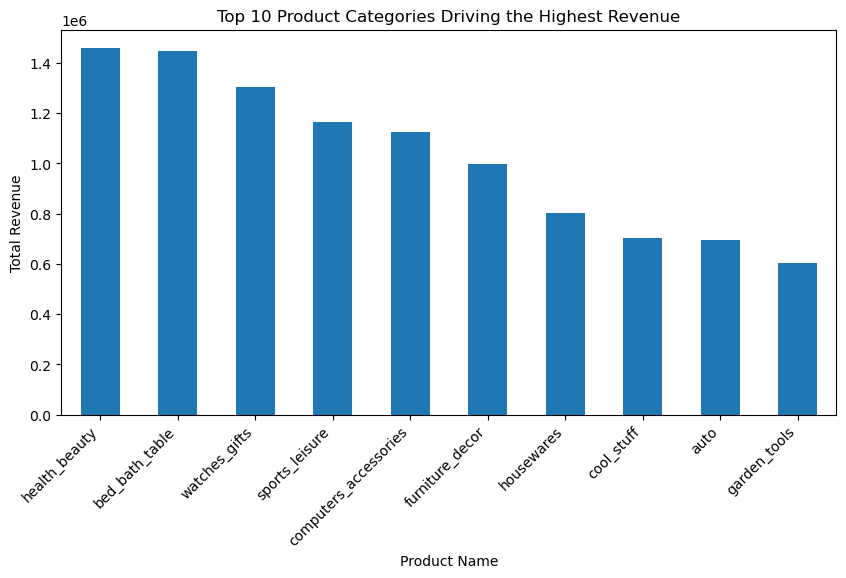

In [34]:
# Visualize the top 10 product category that contribute most revenue
plt.figure(figsize=(10, 5))
top_10_category.plot(kind='bar')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.title("Top 10 Product Categories Driving the Highest Revenue")
plt.show()

## Findings
    - Health & Beauty Leads Revenue: The Health & Beauty category generates the highest revenue (1.46M), indicating strong consumer demand for personal care products.

In [35]:
# Which sellers contribute to most of the revenue
sellers = data.groupby('seller_name')['payment_value'].sum()
top_10_sellers = sellers.sort_values(ascending=False).head(10)
top_10_sellers

seller_name
Ana Cecília da Luz           267052.46
Leonardo Lima                256381.87
Caroline Machado             253211.61
Brenda Pastor                234070.48
Sra. Stephany Vasconcelos    228644.10
Carolina Casa Grande         201922.01
Oliver Martins               189655.52
Bento Santos                 173437.73
Kaique Fogaça                167669.26
Sr. Davi Moura               167547.64
Name: payment_value, dtype: float64

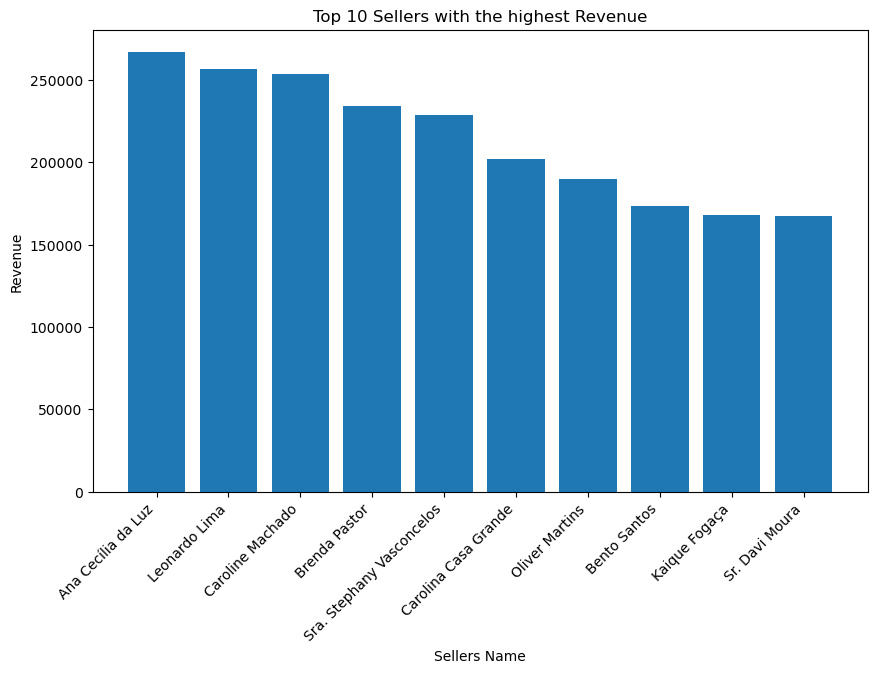

In [36]:
# Visualize top sellers
plt.figure(figsize=(10,6))
plt.bar(top_10_sellers.index, top_10_sellers.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Sellers Name')
plt.ylabel('Revenue')
plt.title('Top 10 Sellers with the highest Revenue')
plt.show()

# How efficient is the delivery process interms of ontime perfomance?

In [37]:
# Convert dates to datetime formart
data['order_delivered_customer_date'] = pd.to_datetime(data['order_delivered_customer_date'])

# Check if an order was delivered on or before the estimated delivery date
data['on_time_delivery'] = data['order_delivered_customer_date'] <= data['order_estimated_delivery_date']

# Calculate the percentage of on-time delivery
on_time_delivery_rate = data['on_time_delivery'].mean() * 100

print(f"On-Time Delivery Rate: {on_time_delivery_rate:.2f}%")


On-Time Delivery Rate: 92.21%


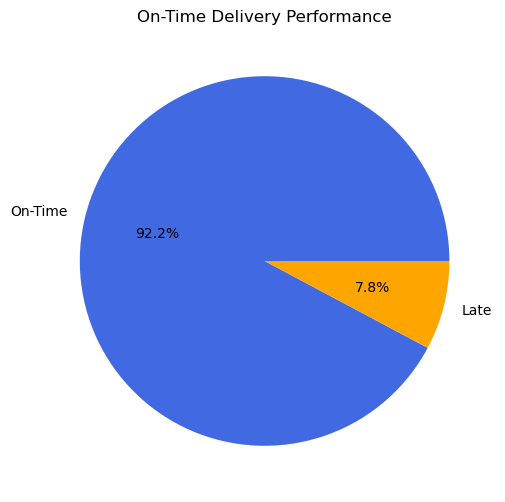

In [38]:
# Visualize ontime vs late Deliveries
# Calculate the onetime and late deliveries
on_time = data['on_time_delivery'].sum()
late = len(data) - on_time

plt.figure(figsize=(6, 6))
plt.pie([on_time, late], labels=['On-Time', 'Late'], autopct='%1.1f%%', colors=['royalblue', 'orange'])
plt.title('On-Time Delivery Performance')
plt.show()

### What payment methods are most popular and how do they impact revenue?

In [56]:
data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_time', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'product_weight(g)',
       'product_length(cm)', 'product_height(cm)', 'product_width(cm)',
       'review_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'product_category', 'seller_name', 'year_month',
       'on_time_delivery'],
      dtype='object')

In [47]:
# Most used payment methods
payment_methods = data.groupby('payment_type')['order_id'].count().sort_values(ascending=False)
payment_methods

payment_type
credit_card    76345
boleto         19555
voucher         5635
debit_card      1519
Name: order_id, dtype: int64

In [46]:
# Payment values and the revenue they generate
payment_revenue = data.groupby('payment_type')['payment_value'].sum().sort_values(ascending=False)
payment_revenue

payment_type
credit_card    12653573.20
boleto          2902746.11
voucher          353787.24
debit_card       222366.31
Name: payment_value, dtype: float64

In [ ]:
category_df = pd.DataFrame({'Total Revenue': category, 'No of Orders': category_analysis})
category_df = category_df.sort_values(by = 'Total Revenue', ascending=False).head(10)

In [ ]:
# Merge this two df
payment_df = pd.DataFrame({'Revenue':payment_revenue, 'Type': payment_methods})
payment_df


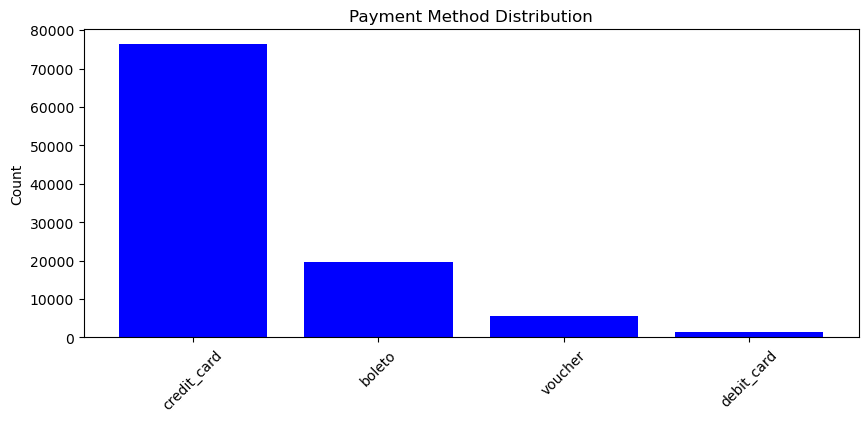

In [57]:
# Plot Payment Method Distribution
plt.figure(figsize=(10, 4))
plt.bar(payment_methods.index, payment_methods.values, color='blue')
plt.title("Payment Method Distribution")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

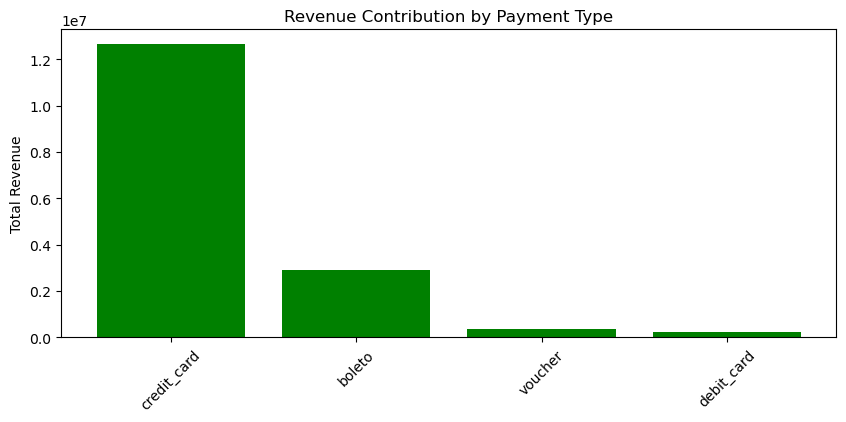

In [58]:
plt.figure(figsize=(10, 4))
plt.bar(payment_revenue.index, payment_revenue.values, color='green')
plt.title("Revenue Contribution by Payment Type")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

In [66]:
# Order processing time by payment method (approval time - purchase time)
data['processing_time'] = (data['order_approved_time'] - data['order_purchase_timestamp']).dt.total_seconds() / 3600
processing_time = data.groupby('payment_type')['processing_time'].mean()

In [67]:
processing_time

payment_type
boleto         33.022212
credit_card     4.499843
debit_card      8.980989
voucher         8.408607
Name: processing_time, dtype: float64

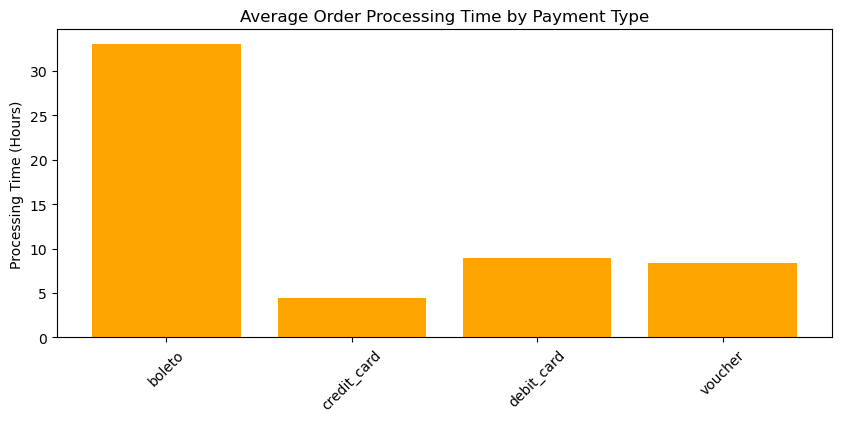

In [68]:
# Plot Order Processing Time
plt.figure(figsize=(10, 4))
plt.bar(processing_time.index, processing_time.values, color='orange')
plt.title("Average Order Processing Time by Payment Type")
plt.ylabel("Processing Time (Hours)")
plt.xticks(rotation=45)
plt.show()

The analysis shows that boleto takes the longest to process (33 hours), due to its manual verification process. Credit cards are the fastest (4.5 hours), offering quicker approval. Debit cards (9 hours) and vouchers (8.4 hours) are slower but still faster than boleto.

In [69]:
# Calculate shipping time in hours
data['shipping_time'] = (data['order_delivered_customer_date'] - data['order_purchase_timestamp']).dt.total_seconds() / 3600

In [73]:
# Analyze correlation between review score and order performance metrics
review_order_correlation = data[['review_score', 'processing_time', 'shipping_time', 'price']].corr()
review_order_correlation

,review_score,processing_time,shipping_time,price
review_score,1.000000,-0.014415,-0.315345,-0.000753
processing_time,-0.014415,1.000000,0.080357,0.016375
shipping_time,-0.315345,0.080357,1.000000,0.059075
price,-0.000753,0.016375,0.059075,1.000000


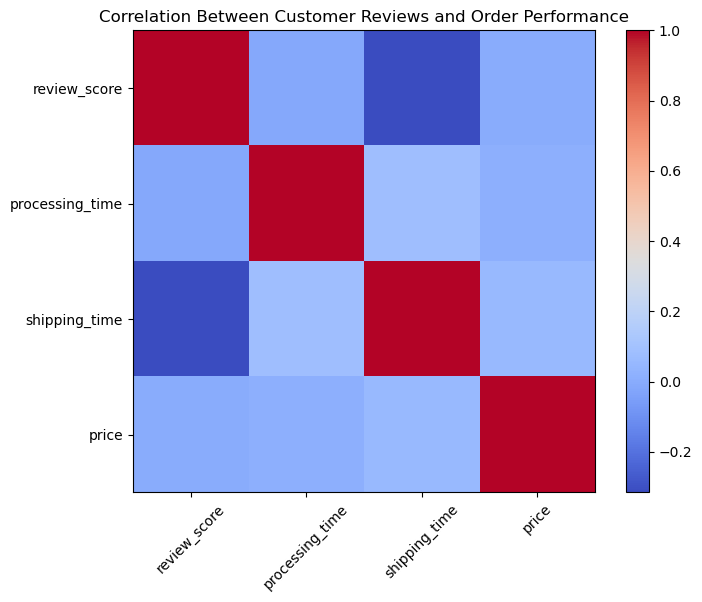

In [72]:
# Plot correlation matrix
plt.figure(figsize=(8, 6))
plt.imshow(review_order_correlation, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(review_order_correlation.columns)), review_order_correlation.columns, rotation=45)
plt.yticks(range(len(review_order_correlation.columns)), review_order_correlation.columns)
plt.title("Correlation Between Customer Reviews and Order Performance")
plt.show()


Review score and processing time: No significant correlation.

Review score and shipping time: Moderate negative correlation (-0.32), indicating that longer shipping times lead to lower review scores.

Review score and price: No significant correlation.

Processing time and shipping time: Very weak positive correlation.

Processing time and price: No significant correlation.

Shipping time and price: Very weak positive correlation.

Key Insight:
Longer shipping times lead to lower review scores, suggesting that improving shipping speed could enhance customer satisfaction

In [76]:


# Convert timestamps to datetime
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])

# Aggregate customer engagement metrics
customer_metrics = data.groupby('customer_id').agg(
    total_spent=('payment_value', 'sum'),
    order_count=('order_id', 'count'),
    review_count=('review_id', 'count'),
    last_purchase=('order_purchase_timestamp', 'max')
)

# Convert last purchase date to days since last order
customer_metrics['days_since_last_order'] = (data['order_purchase_timestamp'].max() - customer_metrics['last_purchase']).dt.days

# Drop last purchase column
customer_metrics = customer_metrics.drop(columns=['last_purchase'])

# Sort by total spending to find most valuable customers
top_customers = customer_metrics.sort_values(by='total_spent', ascending=False)

# Display top customers
top_customers


,total_spent,order_count,review_count,days_since_last_order
customer_id,,,,
71901689c5f3e5adc27b1dd16b33f0b8,15978.65,5,5,99
1617b1357756262bfa56ab541c47bc16,13664.08,1,1,333
be1c4e52bb71e0c54b11a26b8e8d59f2,10247.40,12,12,316
0d861a5e4dd6a9079d89e1330848f0ab,9258.24,8,8,17
cc803a2c412833101651d3f90ca7de24,8891.00,2,2,89
...,...,...,...,...
d2c63ad286e3ca9dd69218008d61ff81,11.62,1,1,601
046f890135acc703faff4c1fc0c2d73c,11.56,2,2,68
8e4bd65db637116b6b68109e4df21b84,10.89,1,1,68


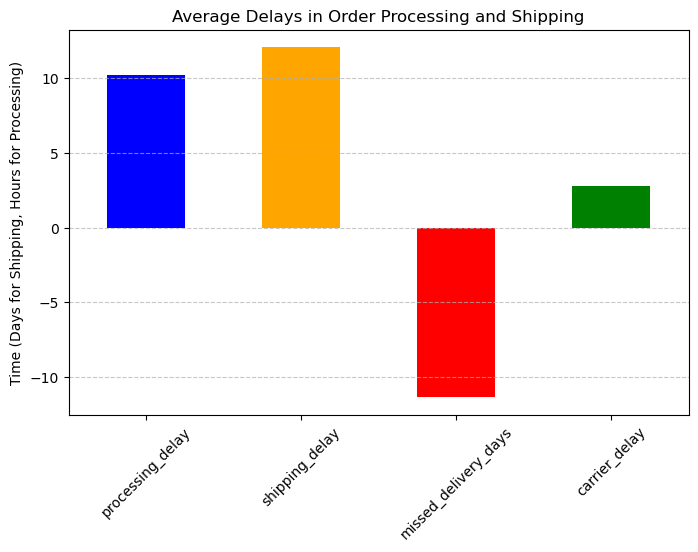

In [77]:


# Convert timestamps to datetime
date_columns = ['order_purchase_timestamp', 'order_approved_time', 
                'order_delivered_carrier_date', 'order_delivered_customer_date', 
                'order_estimated_delivery_date']
data[date_columns] = data[date_columns].apply(pd.to_datetime)

# Calculate delays
data['processing_delay'] = (data['order_approved_time'] - data['order_purchase_timestamp']).dt.total_seconds() / 3600  # In hours
data['shipping_delay'] = (data['order_delivered_customer_date'] - data['order_approved_time']).dt.total_seconds() / 86400  # In days
data['missed_delivery_days'] = (data['order_delivered_customer_date'] - data['order_estimated_delivery_date']).dt.total_seconds() / 86400  # In days
data['carrier_delay'] = (data['order_delivered_carrier_date'] - data['order_approved_time']).dt.total_seconds() / 86400  # In days

# Aggregate metrics
bottlenecks = data[['processing_delay', 'shipping_delay', 'missed_delivery_days', 'carrier_delay']].mean()

# Plot bottlenecks
plt.figure(figsize=(8, 5))
bottlenecks.plot(kind='bar', color=['blue', 'orange', 'red', 'green'])
plt.title("Average Delays in Order Processing and Shipping")
plt.ylabel("Time (Days for Shipping, Hours for Processing)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


## Operational Bottlenecks in Shipping and Order Processing

### Processing Delay: **10.19 hours**  
- On average, it takes about **10 hours** for an order to be approved after purchase.  
- A high processing time can indicate **inefficiencies in payment confirmation or order validation**.  

### Shipping Delay: **12.05 days**  
- Orders take **12 days on average** to be shipped after approval.  
- This suggests potential **warehouse or logistics delays**, which can impact customer satisfaction.  

### Missed Delivery Days: **-11.35 days**  
- Negative value means orders are delivered **11 days earlier** than estimated.  
- This might suggest that the estimated delivery dates are **too conservative**, which could be adjusted to set more accurate expectations.  

### Carrier Delay: **2.79 days**  
- It takes nearly **3 days** for the carrier to receive the package after approval.  
- A high carrier delay indicates possible **warehouse fulfillment issues or slow handover to shipping partners**.  


## Conclusion and Recommendations  

### Conclusion  
The analysis highlights key trends and challenges in order performance, revenue generation, and operational efficiency:  

- **Orders and Revenue Growth:** Business experienced growth from 2016 to 2018, with peak sales in **November 2017**.  
- **Order-Revenue Correlation:** A strong **positive correlation** suggests that increasing order volume directly boosts revenue.  
- **Top Revenue Contributors:** The **Health & Beauty** category dominates sales, indicating a high demand for personal care products.  
- **Delivery Performance:** While **92.21%** of orders are delivered on time, delays in processing and carrier handover impact efficiency.  
- **Payment Processing:** **Boleto** payments significantly slow down order approvals, while **credit cards** offer the fastest processing.  
- **Customer Satisfaction:** **Longer shipping times correlate with lower review scores**, emphasizing the need for better logistics management.  

### Recommendations  

1. **Optimize Payment Processing:**  
   - Promote **credit card payments** to reduce approval times.  
   - Streamline manual verification for **boleto** transactions to minimize delays.  

2. **Enhance Delivery Efficiency:**  
   - **Reduce warehouse processing delays** by improving order validation workflows.  
   - Partner with reliable **logistics providers** to minimize carrier delays.  
   - Adjust **estimated delivery dates** to set realistic customer expectations.  

3. **Boost Revenue Growth:**  
   - Leverage **peak seasons like November** with targeted promotions.  
   - Expand **Health & Beauty product offerings** to maximize sales potential.  

4. **Improve Customer Experience:**  
   - Address **shipping delays** to enhance **review scores and satisfaction**.  
   - Offer **faster shipping options** to meet customer expectations.  

By implementing these strategies, the business can **increase efficiency, boost revenue, and enhance customer satisfaction**. 🚀  
